In [91]:
import matplotlib.pyplot as plt
import networkx as nx
from preprocessing import Preprocessing as pp
import plotly.graph_objs as go
import plotly.subplots as sp
from pyvis.network import Network
from classes import transportnetwork as tn


In [92]:
G = pp.create_network_from_edges("../../../data/road-euroroad.edges")

100%|██████████| 1419/1419 [00:00<00:00, 6373.15it/s]


In [93]:
G.number_of_nodes()

1174

In [94]:
G.number_of_edges()

1417

DEGREE CENTRALITY

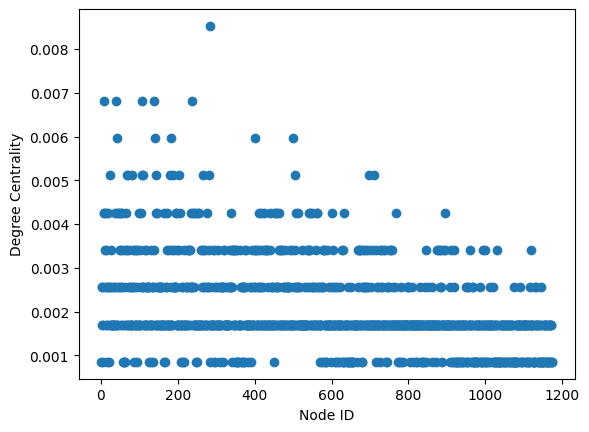

In [95]:
# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Extract degree centralities and nodes
nodes = degree_centrality.keys()
centralities = degree_centrality.values()

# Plot the degree centrality as a scatter plot
plt.scatter(nodes, centralities)
plt.xlabel("Node ID")
plt.ylabel("Degree Centrality")
plt.show()

BETWEENESS CENTRALITY

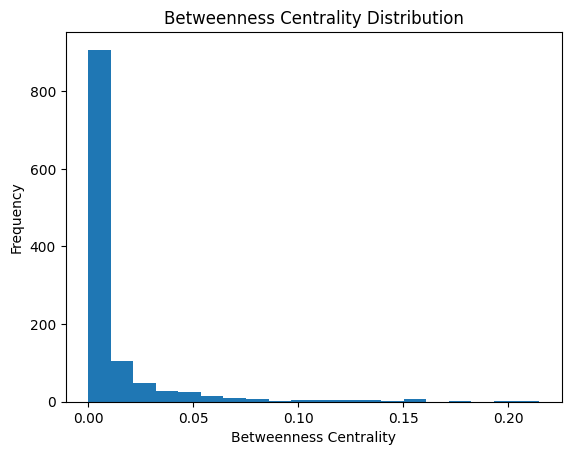

In [96]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Plot the betweenness centrality distribution
plt.hist(list(betweenness_centrality.values()), bins=20)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.title("Betweenness Centrality Distribution")
plt.show()

CLOSENESS CENTRALITY

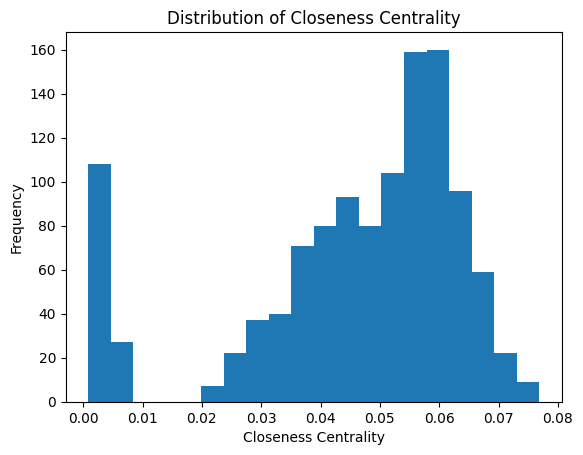

In [97]:
# Compute the closeness centrality for each node
closeness_centrality = nx.closeness_centrality(G)

# Plot the distribution of closeness centrality
plt.hist(list(closeness_centrality.values()), bins=20)
plt.title("Distribution of Closeness Centrality")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")
plt.show()

In [98]:
def analyse_centrality(TN):
    # Calculate the centralities for each node
    degree_centralities = nx.degree_centrality(TN)
    betweenness_centralities = nx.betweenness_centrality(TN)
    closeness_centralities = nx.closeness_centrality(TN)

    # Sort the nodes based on their centrality values in descending order
    degree_ranks = sorted(degree_centralities.items(), key=lambda x: x[1], reverse=True)
    betweenness_ranks = sorted(betweenness_centralities.items(), key=lambda x: x[1], reverse=True)
    closeness_ranks = sorted(closeness_centralities.items(), key=lambda x: x[1], reverse=True)

    # Create a list to store the node ranks and centralities
    node_centralities = []

    # Iterate through the nodes and calculate their ranks and centralities
    for rank, (node, _) in enumerate(degree_ranks):
        degree_centrality = degree_centralities[node]
        betweenness_centrality = betweenness_centralities[node]
        closeness_centrality = closeness_centralities[node]

        # Calculate the ranks of the node's centralities in the sorted lists
        degree_rank = degree_ranks.index((node, degree_centrality)) + 1
        betweenness_rank = betweenness_ranks.index((node, betweenness_centrality)) + 1
        closeness_rank = closeness_ranks.index((node, closeness_centrality)) + 1

        # Add the node's ranks and centralities to the list
        node_centralities.append((node, degree_rank, degree_centrality, betweenness_rank, betweenness_centrality, closeness_rank, closeness_centrality))

        # Print out the centrality information for the node
        print(f"Node {node}:")
        print(f"\tDegree Centrality Rank: {degree_rank}/{len(degree_ranks)}, Value: {degree_centrality:.4f}")
        print(f"\tBetweenness Centrality Rank: {betweenness_rank}/{len(betweenness_ranks)}, Value: {betweenness_centrality:.4f}")
        print(f"\tCloseness Centrality Rank: {closeness_rank}/{len(closeness_ranks)}, Value: {closeness_centrality:.4f}")

    # Return the list of node ranks and centralities
    return node_centralities

In [99]:
node_centralities = analyse_centrality(G)

Node 284:
	Degree Centrality Rank: 1/1174, Value: 0.0085
	Betweenness Centrality Rank: 2/1174, Value: 0.2125
	Closeness Centrality Rank: 10/1174, Value: 0.0730
Node 7:
	Degree Centrality Rank: 2/1174, Value: 0.0068
	Betweenness Centrality Rank: 13/1174, Value: 0.1443
	Closeness Centrality Rank: 31/1174, Value: 0.0695
Node 39:
	Degree Centrality Rank: 3/1174, Value: 0.0068
	Betweenness Centrality Rank: 301/1174, Value: 0.0092
	Closeness Centrality Rank: 324/1174, Value: 0.0583
Node 137:
	Degree Centrality Rank: 4/1174, Value: 0.0068
	Betweenness Centrality Rank: 50/1174, Value: 0.0620
	Closeness Centrality Rank: 67/1174, Value: 0.0669
Node 107:
	Degree Centrality Rank: 5/1174, Value: 0.0068
	Betweenness Centrality Rank: 86/1174, Value: 0.0433
	Closeness Centrality Rank: 262/1174, Value: 0.0600
Node 236:
	Degree Centrality Rank: 6/1174, Value: 0.0068
	Betweenness Centrality Rank: 96/1174, Value: 0.0406
	Closeness Centrality Rank: 111/1174, Value: 0.0644
Node 43:
	Degree Centrality Rank: 

In [100]:
import plotly.express as px
import plotly.graph_objects as go

# Define the compute_centrality_analysis() function
def compute_centrality_analysis(G, centrality):
    if centrality == 'degree':
        return nx.degree_centrality(G)
    elif centrality == 'betweenness':
        return nx.betweenness_centrality(G)
    elif centrality == 'closeness':
        return nx.closeness_centrality(G)
    else:
        raise ValueError('Invalid centrality measure')

def plot_centralities_analysis(G, centralities, titles):
    # Set up the plot
    fig = go.Figure()

    colors = ['red', 'green', 'blue']

    # Plot the centrality for each node in the graph
    for j, centrality in enumerate(centralities):
        centrality_scores = centrality(G)
        sorted_scores = sorted(centrality_scores.values(), reverse=True)
        #fig.add_trace(go.Histogram(x=sorted_scores, nbinsx=20, marker_color='blue', name=titles[j]))
        fig.add_trace(go.Histogram(x=sorted_scores, nbinsx=20, marker_color=colors[j], name=titles[j]))

    # Set layout and show the plot
    fig.update_layout(title='Centralities Histogram', xaxis_title='Centrality Score', yaxis_title='Count')
    fig.show()

# Plot the centralities if the user wants to
if user_input == "yes":
    titles = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']
    centralities = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality]

    # Plot the centralities
    plot_centralities_histogram(G, centralities, titles)

In [101]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


In [102]:
import matplotlib.pyplot as plt
import networkx as nx
from preprocessing import Preprocessing as pp
import plotly.graph_objs as go
import plotly.subplots as sp
from pyvis.network import Network
from classes import transportnetwork as tn


G = pp.create_network_from_edges("../../../data/road-euroroad.edges")
TN = tn.TransportNetwork(G)

# Calculate degree, betweenness, and closeness centrality for each node
degree_centrality = nx.degree_centrality(TN.graph)
betweenness_centrality = nx.betweenness_centrality(TN.graph)
closeness_centrality = nx.closeness_centrality(TN.graph)

# Sort nodes by degree centrality
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_nodes = [x[0] for x in sorted_nodes]

# Create traces for each centrality metric
degree_trace = go.Bar(
    x=sorted_nodes,
    y=[degree_centrality[node] for node in sorted_nodes],
    name='Degree Centrality',
    marker_color='rgb(55, 83, 109)',
)

betweenness_trace = go.Bar(
    x=sorted_nodes,
    y=[betweenness_centrality[node] for node in sorted_nodes],
    name='Betweenness Centrality',
    marker_color='rgb(26, 118, 255)',
)

closeness_trace = go.Bar(
    x=sorted_nodes,
    y=[closeness_centrality[node] for node in sorted_nodes],
    name='Closeness Centrality',
    marker_color='rgb(255, 140, 0)',
)

# Create a subplot with three vertical bars
fig = sp.make_subplots(rows=3, cols=1, shared_xaxes=True)

# Add the traces to the subplot
fig.append_trace(degree_trace, row=1, col=1)
fig.append_trace(betweenness_trace, row=2, col=1)
fig.append_trace(closeness_trace, row=3, col=1)

# Set the layout of the subplot
fig.update_layout(
    title='Centrality Measures for Each Node',
    xaxis=dict(title='Nodes', tickangle=45),
    yaxis=dict(title='Centrality', tickvals=list(range(0, 11)), tickformat='.1f'),
    height=900,
     template='plotly_white'
)

# Show the plot
fig.show()


100%|██████████| 1419/1419 [00:00<00:00, 240269.56it/s]


In [103]:
print(TN)

Graph type: <class 'networkx.classes.graph.Graph'>
- Number of nodes: 1174
- Number of edges: 1417



In [104]:
import matplotlib.pyplot as plt
import networkx as nx
from preprocessing import Preprocessing as pp
import plotly.graph_objs as go
import plotly.subplots as sp
from pyvis.network import Network
from classes import transportnetwork as tn

G2 = pp.create_network_from_trailway("../../../data/Railway Data_JL.xlsx")
TN = tn.TransportNetwork(G2)

# Get the connected components of the graph
connected_components = nx.connected_components(TN.graph)

for idx, component in enumerate(connected_components):
    subgraph = TN.graph.subgraph(component)

    # Calculate degree centrality for each node
    degree_centrality = nx.degree_centrality(subgraph)
    print(f"Connected component {idx + 1}:")
    print(f"Degree centrality: {degree_centrality}\n")

    # Calculate betweenness centrality for each node
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    print(f"Connected component {idx + 1}:")
    print(f"Betweenness centrality: {betweenness_centrality}\n")

    # Calculate closeness centrality for each node
    closeness_centrality = nx.closeness_centrality(subgraph)
    print(f"Connected component {idx + 1}:")
    print(f"Closeness centrality: {closeness_centrality}\n")


Network creation: 


100%|██████████| 69638/69638 [00:02<00:00, 29920.09it/s]


Connected component 1:
Degree centrality: {692: 0.004415011037527594, 1351: 0.003679175864606328, 698: 0.0011037527593818985, 944: 0.002207505518763797, 232: 0.0029433406916850625, 1639: 0.0007358351729212656, 2335: 0.001839587932303164, 1512: 0.0014716703458425313, 127: 0.001839587932303164, 259: 0.0025754231052244297, 1835: 0.0011037527593818985, 1480: 0.0007358351729212656, 2362: 0.0007358351729212656, 503: 0.0014716703458425313, 1009: 0.0025754231052244297, 2058: 0.01177336276674025, 802: 0.008094186902133923, 681: 0.0025754231052244297, 1704: 0.001839587932303164, 2314: 0.0025754231052244297, 314: 0.008094186902133923, 783: 0.0014716703458425313, 542: 0.0033112582781456954, 1148: 0.0007358351729212656, 683: 0.012141280353200883, 983: 0.004047093451066961, 390: 0.011405445180279618, 804: 0.0033112582781456954, 1005: 0.006622516556291391, 1309: 0.0014716703458425313, 627: 0.004047093451066961, 123: 0.001839587932303164, 2330: 0.005886681383370125, 529: 0.004047093451066961, 530: 0.0

In [105]:
import networkx as nx
import pandas as pd

def analyse_centrality(TN):
    # Get the connected components of the graph
    connected_components = nx.connected_components(TN.graph)

    # Initialize dictionaries to store the results
    degree_centrality_dict = {}
    betweenness_centrality_dict = {}
    closeness_centrality_dict = {}

    for idx, component in enumerate(connected_components):
        subgraph = TN.graph.subgraph(component)

        # Calculate degree centrality for each node
        degree_centrality = nx.degree_centrality(subgraph)
        degree_centrality_dict[f"Component {idx + 1}"] = degree_centrality

        # Calculate betweenness centrality for each node
        betweenness_centrality = nx.betweenness_centrality(subgraph)
        betweenness_centrality_dict[f"Component {idx + 1}"] = betweenness_centrality

        # Calculate closeness centrality for each node
        closeness_centrality = nx.closeness_centrality(subgraph)
        closeness_centrality_dict[f"Component {idx + 1}"] = closeness_centrality

    # Convert the dictionaries to Pandas dataframes and return them
    degree_df = pd.DataFrame(degree_centrality_dict)
    betweenness_df = pd.DataFrame(betweenness_centrality_dict)
    closeness_df = pd.DataFrame(closeness_centrality_dict)
    return degree_df, betweenness_df, closeness_df

In [106]:
degree_df, betweenness_df, closeness_df = analyse_centrality(TN)
print(degree_df)
print(betweenness_df)
print(closeness_df)

      Component 1
2        0.000736
3        0.000736
4        0.002208
5        0.001104
6        0.000736
...           ...
2810     0.000736
2811     0.000736
2812     0.000736
2813     0.001840
2814     0.000736

[2719 rows x 1 columns]
       Component 1
2     1.156310e-03
3     0.000000e+00
4     2.976263e-06
5     0.000000e+00
6     0.000000e+00
...            ...
2810  0.000000e+00
2811  6.555519e-04
2812  3.676468e-04
2813  2.290438e-04
2814  2.708263e-07

[2719 rows x 1 columns]
      Component 1
2        0.109561
3        0.149283
4        0.133747
5        0.117095
6        0.106409
...           ...
2810     0.104837
2811     0.097200
2812     0.116858
2813     0.116134
2814     0.107012

[2719 rows x 1 columns]


In [107]:
import plotly.graph_objs as go
import plotly.subplots as sp

def plot_centrality(degree_df, betweenness_df, closeness_df):
    # Create a subplot for each centrality measure
    fig = sp.make_subplots(rows=1, cols=3, subplot_titles=("Degree Centrality", "Betweenness Centrality", "Closeness Centrality"))

    # Loop through each connected component and add a bar chart for each centrality measure
    for col, df in enumerate((degree_df, betweenness_df, closeness_df)):
        for component in df.columns:
            fig.add_trace(
                go.Bar(x=df.index, y=df[component], name=component),
                row=1, col=col+1
            )

    # Set the layout of the figure
    fig.update_layout(
        title="Centrality Analysis",
        xaxis=dict(title="Node ID"),
        yaxis=dict(title="Centrality"),
        barmode="group",
        bargap=0.15,
        bargroupgap=0.1,
    template='plotly_white'
    )

    # Show the figure
    fig.show()


In [108]:
degree_df, betweenness_df, closeness_df = analyse_centrality(TN)
plot_centrality(degree_df, betweenness_df, closeness_df)


In [109]:
import matplotlib.pyplot as plt
import networkx as nx
from preprocessing import Preprocessing as pp
import plotly.graph_objs as go
import plotly.subplots as sp
from classes import transportnetwork as tn

G2 = pp.create_network_from_trailway("../../../data/Railway Data_JL.xlsx")
TN = tn.TransportNetwork(G2)

# Get the connected components of the graph
connected_components = nx.connected_components(TN.graph)

for idx, component in enumerate(connected_components):
    subgraph = TN.graph.subgraph(component)

    # Calculate degree centrality for each node
    degree_centrality = nx.degree_centrality(subgraph)

    # Calculate betweenness centrality for each node
    betweenness_centrality = nx.betweenness_centrality(subgraph)

    # Calculate closeness centrality for each node
    closeness_centrality = nx.closeness_centrality(subgraph)

    # Map degree centrality
    fig = go.Figure(data=go.Scatter(x=list(degree_centrality.keys()), y=list(degree_centrality.values()), mode='markers', marker=dict(size=10*list(degree_centrality.values()), color=list(degree_centrality.values()), colorscale='Viridis', showscale=True)))
    fig.update_layout(title=f"Connected component {idx + 1}: Degree Centrality", xaxis_title="Nodes", yaxis_title="Degree Centrality")
    fig.show()

    # Map betweenness centrality
    fig = go.Figure(data=go.Scatter(x=list(betweenness_centrality.keys()), y=list(betweenness_centrality.values()), mode='markers', marker=dict(size=10*list(betweenness_centrality.values()), color=list(betweenness_centrality.values()), colorscale='Viridis', showscale=True)))
    fig.update_layout(title=f"Connected component {idx + 1}: Betweenness Centrality", xaxis_title="Nodes", yaxis_title="Betweenness Centrality")
    fig.show()

    # Map closeness centrality
    fig = go.Figure(data=go.Scatter(x=list(closeness_centrality.keys()), y=list(closeness_centrality.values()), mode='markers', marker=dict(size=10*list(closeness_centrality.values()), color=list(closeness_centrality.values()), colorscale='Viridis', showscale=True)))
    fig.update_layout(title=f"Connected component {idx + 1}: Closeness Centrality", xaxis_title="Nodes", yaxis_title="Closeness Centrality")
    fig.show()


Network creation: 


100%|██████████| 69638/69638 [00:02<00:00, 28522.64it/s]


In [110]:
pip install geopandas

  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.9 MB/s eta 0:00:0000:010:01
  Using cached Fiona-1.9.2.tar.gz (919 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      <string>:82: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
      CRITICAL:root:A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, a

In [87]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
gdf = gpd.read_file("../../../data/Railway Data_JL.xlsx")

# Create networkx graph
G = nx.Graph()
for index, row in gdf.iterrows():
    G.add_edge(row['node1'], row['node2'], weight=row['length'])
    def map_centrality(G):
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G)
    nx.set_node_attributes(G, degree_centrality, 'degree_centrality')

    # Calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')

    # Calculate closeness centrality
    closeness_centrality = nx.closeness_centrality(G)
    nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

# Call the function to add centrality measures to nodes
map_centrality(G)
# Create dataframe from graph nodes
nodes_df = gpd.GeoDataFrame(list(G.nodes), columns=['node'])
nodes_df = nodes_df.merge(gdf[['node1', 'geometry']], left_on='node', right_on='node1')

# Create map of nodes colored by degree centrality
nodes_df.plot(column='degree_centrality', cmap='cool', legend=True)
plt.show()

IndentationError: expected an indented block after function definition on line 10 (419591144.py, line 12)